In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv(r'C:\Users\Sourav\OneDrive\Desktop\HealthCare Analytics ineuron project/Heart disease.csv')

In [67]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [69]:
data = df.copy()

In [70]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
def age_group_conv(data):
    if data <= 40:
        return "40 yrs or less"
    elif (data > 40) & (data <= 60):
        return "41 - 60 yrs"
    else:
        return "More than 60 yrs"

In [72]:
data['age_group'] = data['age'].apply(age_group_conv)

In [73]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,More than 60 yrs
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,40 yrs or less
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41 - 60 yrs
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,41 - 60 yrs
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,41 - 60 yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,41 - 60 yrs
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,41 - 60 yrs
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,More than 60 yrs
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,41 - 60 yrs


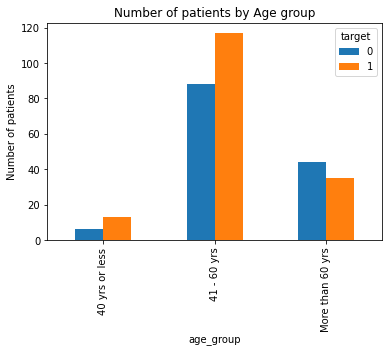

In [74]:
#comparision of age_group and outcome
data.groupby(['age_group', 'target']).count()['age'].unstack().plot.bar()
plt.ylabel("Number of patients")
plt.title("Number of patients by Age group")
plt.show()

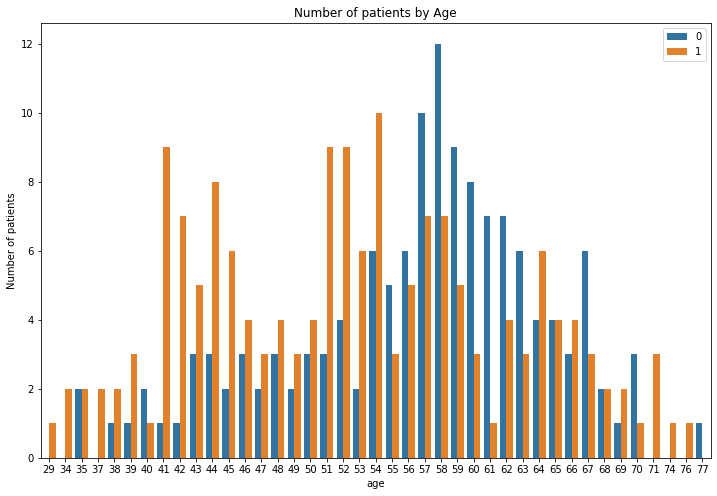

In [75]:
#comparision of different ages and outcome
plt.figure(figsize = (12,8))
sns.countplot(x= "age", data = data, hue = "target")
plt.legend(loc='upper right')
plt.ylabel("Number of patients")
plt.title("Number of patients by Age")
plt.show()

In [77]:
#converting values for some of the categorical variables
data['sex'] = data.sex.map({0: 'female', 1: 'male'})
data['target'] = data.target.map({0: 'no', 1: 'yes'})
data['exang'] = data.exang.map({0:'no',1:'yes'})
data['fbs'] = data.fbs.map({0:'<120mg/dl',1:'>120mg/dl'})

In [78]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,male,3,145,233,>120mg/dl,0,150,no,2.3,0,0,1,yes,More than 60 yrs
1,37,male,2,130,250,<120mg/dl,1,187,no,3.5,0,0,2,yes,40 yrs or less
2,41,female,1,130,204,<120mg/dl,0,172,no,1.4,2,0,2,yes,41 - 60 yrs
3,56,male,1,120,236,<120mg/dl,1,178,no,0.8,2,0,2,yes,41 - 60 yrs
4,57,female,0,120,354,<120mg/dl,1,163,yes,0.6,2,0,2,yes,41 - 60 yrs


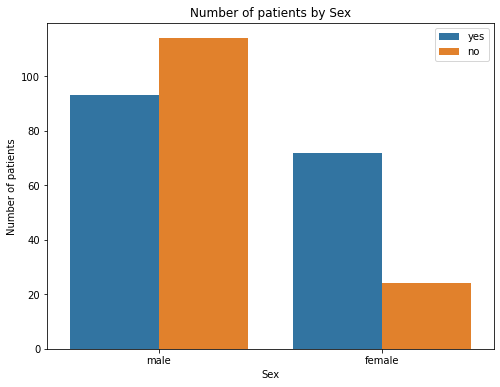

In [15]:
#comparision of sex with outcome
plt.figure(figsize = (8,6))
sns.countplot(x= "sex", data = data, hue = "target")
plt.legend(loc='upper right')
plt.xlabel("Sex")
plt.ylabel("Number of patients")
plt.title("Number of patients by Sex")
plt.show()

In [62]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
target         int64
age_group     object
dtype: object

In [17]:
data['cp'] = str(data['cp'])

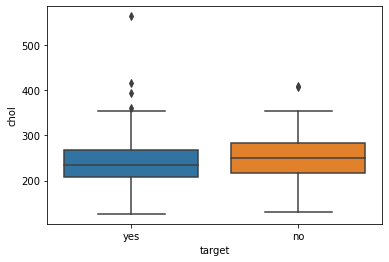

In [39]:
#box plot for cholesterol level and outcome

sns.boxplot(x= 'target', y='chol',data=data)
plt.show()

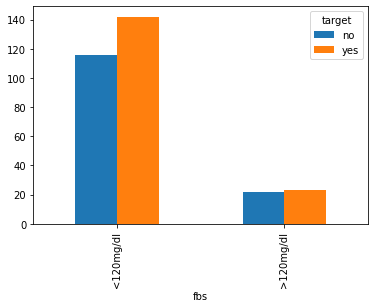

In [79]:
#Comparision of fasting blood sugar with target

data.groupby(['fbs', 'target']).count()['age'].unstack().plot.bar()
plt.show()

In [31]:
data.groupby(['fbs', 'target']).count()['age'].unstack()

target,no,yes
fbs,,
no,116,142
yes,22,23


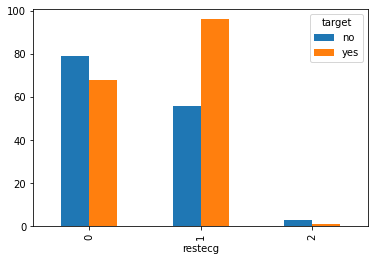

In [41]:
#Comparision of restecg with target

data.groupby(['restecg', 'target']).count()['age'].unstack().plot.bar()
plt.show()

In [36]:
data.groupby(['restecg', 'target']).count()['age'].unstack()

target,no,yes
restecg,,
0,79,68
1,56,96
2,3,1


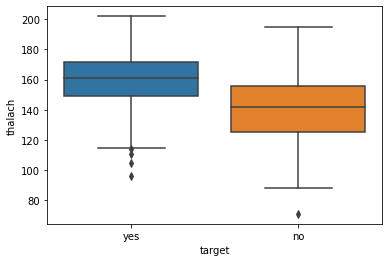

In [42]:
#Comparision of thalach with target
#box plot for max heartrate and outcome

sns.boxplot(x= 'target', y='thalach',data=data)
plt.show()